# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n',) # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Неоконченное высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Другие сферы', 'Торговля', 'Здравоохранение', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Подбор персонала', 'Управляющая компания', 'Сборочные производства', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Образование', 'Страхование', 'Туризм', 'Маркетинг', 'Нефтегазовая промышленность', 'Наука', 'Логистика', 'Государственная служба', 'Металлургия/Промышленность/Машиностроение', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'Салоны красоты и здоровья', 'Сельское хозяйство', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Строительство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [16]:
# We can check it by using "pandas.isnull(obj)[source]" function,
# and than summarize it to get count of null values in each column

df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [17]:
# Try to find categorical features by summarize unique values of object columns
CATEGORICAL_THRESHOLD=1000

CATEGORICAL_FEATHERS = []

for column in df.columns:
    # Skip sample field because we will drop it in next task
    if (column == 'sample'):
        0
    elif (dict(df.dtypes)[column] in ['object']): 
        if (df[column].nunique()<CATEGORICAL_THRESHOLD):
            CATEGORICAL_FEATHERS.append(column)
print('{} {}'.format(CATEGORICAL_FEATHERS, "low unique values, perhaps it's a categorical features"))


# Possible approaches for working with categorical features
# Encode it:
#   - sklearn.preprocessing.LabelEncoder    
#   - sklearn.preprocessing.OneHotEncoder

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'] low unique values, perhaps it's a categorical features


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [18]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    column_list = [
        "PERSONAL_INCOME",
        "CREDIT",
        "FST_PAYMENT",
        "LOAN_AVG_DLQ_AMT",
        "LOAN_MAX_DLQ_AMT"
    ]
    
    for column in df_output.columns:
        if column in column_list:
            print('Update column:', column)
            df_output[column] = df_output[column].map(lambda x: x.replace(',', '.')).astype('float')
        elif column == "AGREEMENT_RK":
            print('Drop column:', column)
            df_output = df_output.drop(columns=[column])
    
    df_output = df_output.fillna(0)
    
    df_output = pd.get_dummies(df_output, columns = CATEGORICAL_FEATHERS, )
    
    return df_output

In [19]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

Drop column: AGREEMENT_RK
Update column: PERSONAL_INCOME
Update column: CREDIT
Update column: FST_PAYMENT
Update column: LOAN_AVG_DLQ_AMT
Update column: LOAN_MAX_DLQ_AMT


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [20]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [21]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

X_train, X_testing, y_train, y_testing = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_testing)
dtc_predict_proba = dtc.predict_proba(X_testing)

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_testing)
rfc_predict_proba = rfc.predict_proba(X_testing)

lr = LogisticRegression(solver='lbfgs', max_iter=3000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_testing)
lr_predict_proba = lr.predict_proba(X_testing)

In [23]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(df_input, prediction):
    prediction_accuracy_score = accuracy_score(df_input, prediction)
    prediction_precision_score = precision_score(df_input, prediction)
    prediction_recall_score = recall_score(df_input, prediction)
    
    print('{} {}'.format('accuracy score is', prediction_accuracy_score))
    print('{} {}'.format('precision score is', prediction_precision_score ))
    print('{} {}'.format('recall score is', prediction_recall_score))          
    
    return prediction_accuracy_score, prediction_precision_score, prediction_recall_score

print("\nDTC")
dtc_accuracy_score, dtc_precision_score, dtc_recall_score = calculate_metrics(y_testing, dtc_predict)    
print("\nRFC")
rfc_accuracy_score, rfc_precision_score, rfc_recall_score = calculate_metrics(y_testing, rfc_predict)
print("\nLR")
lr_accuracy_score, lr_precision_score, lr_recall_score = calculate_metrics(y_testing, lr_predict)



DTC
accuracy score is 0.7970221151740748
precision score is 0.15298507462686567
recall score is 0.14774774774774774

RFC
accuracy score is 0.8784760236479089
precision score is 0.0
recall score is 0.0

LR
accuracy score is 0.877819137289249
precision score is 0.0
recall score is 0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


           DecisionTreeClassifier  RandomForestClassifier  LogisticRegression
accuracy                 0.797022                0.878476            0.877819
precision                0.152985                0.000000            0.000000
recall                   0.147748                0.000000            0.000000


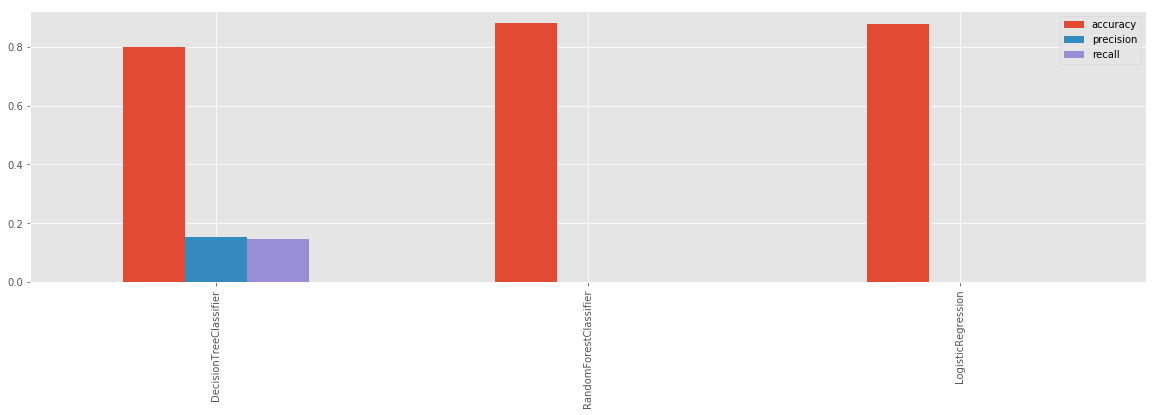

In [24]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
metrics_data = {
                'DecisionTreeClassifier':[dtc_accuracy_score, dtc_precision_score, dtc_recall_score], 
                'RandomForestClassifier':[rfc_accuracy_score, rfc_precision_score, rfc_recall_score], 
                'LogisticRegression':[lr_accuracy_score, lr_precision_score, lr_recall_score], 
               }

metrics_df = pd.DataFrame(data = metrics_data, index = ['accuracy','precision','recall'])                

print(metrics_df)

_, ax = plt.subplots(figsize=(20,5))  

metrics_df.T.plot(kind = 'bar', ax=ax)


(-0.01, 1.01)

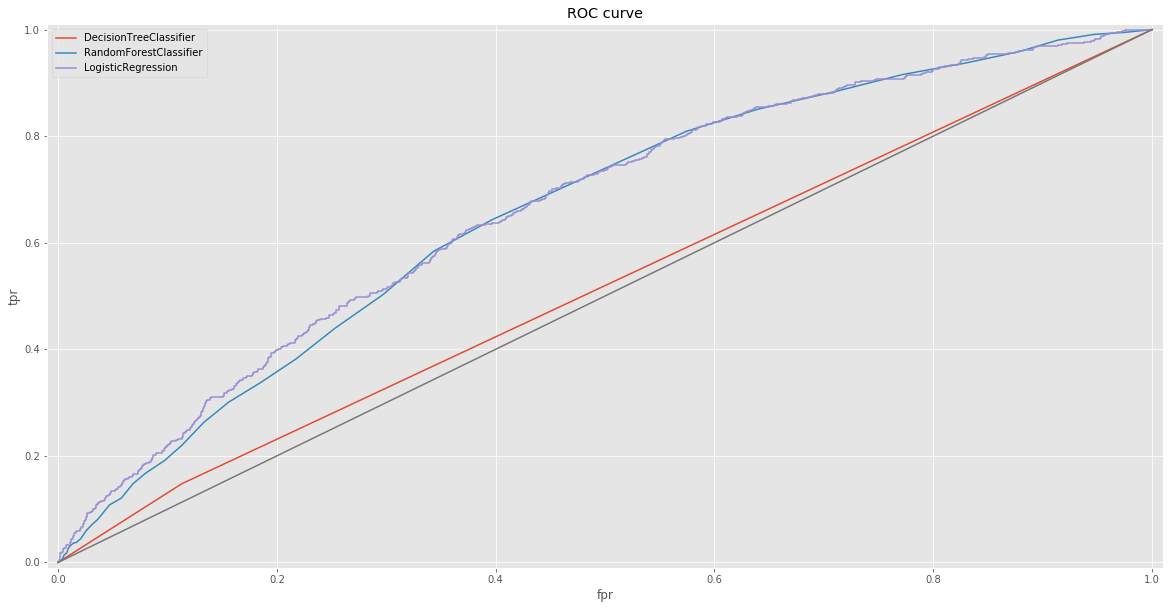

In [25]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve

dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_testing, dtc_predict_proba[:,1])
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_testing, rfc_predict_proba[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_testing, lr_predict_proba[:,1])

plt.figure(figsize=(20, 10))
plt.plot(dtc_fpr, dtc_tpr, label = 'DecisionTreeClassifier')
plt.plot(rfc_fpr, rfc_tpr, label = 'RandomForestClassifier')
plt.plot(lr_fpr, lr_tpr, label = 'LogisticRegression')
plt.legend()
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [26]:
from sklearn.model_selection import cross_val_score, KFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

def calculate_roc_auc_median(black_box,X,y):
    kf = KFold(n_splits=10)
    cvs = cross_val_score(black_box,X,y,scoring='roc_auc',cv=kf).mean()
    print('{} {}'.format('ROC Auc mean:', cvs))
    
print("\nDTC")
calculate_roc_auc_median(dtc,X_testing,y_testing)
print("\nRFC")
calculate_roc_auc_median(rfc,X_testing,y_testing)
print("\nLR")
calculate_roc_auc_median(lr,X_testing,y_testing)


DTC
ROC Auc mean: 0.5395933475388645

RFC
ROC Auc mean: 0.6288623494054436

LR


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC Auc mean: 0.654043786354939


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [27]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict =  dtc.predict_proba(X_test)
## Your Code Here


0.5266018237082066

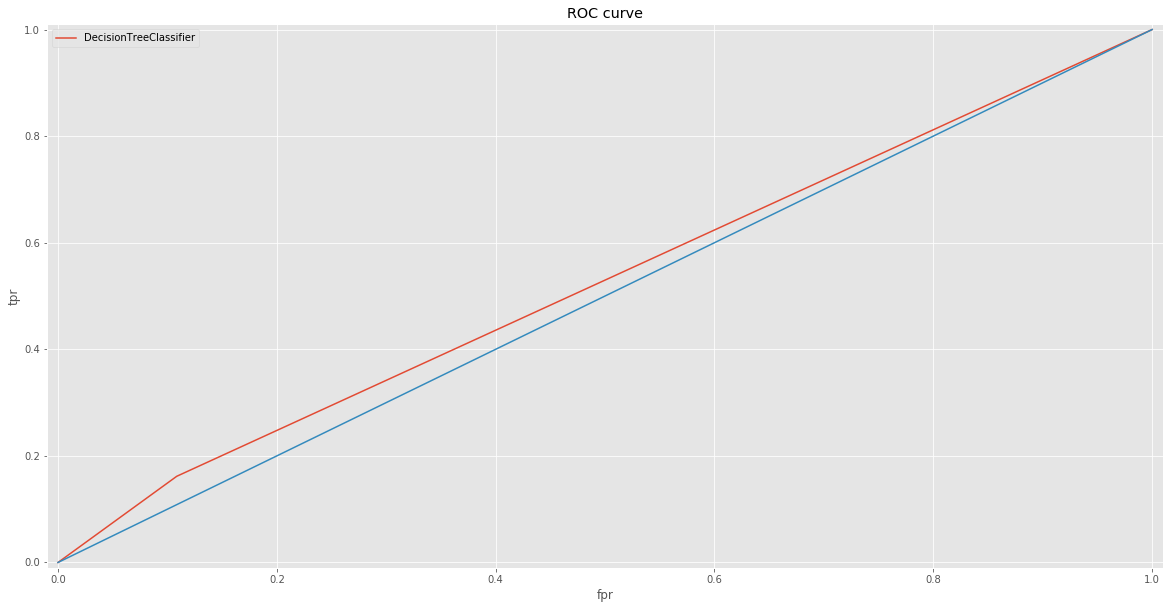

In [28]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

predict_fpr, predict_tpr, predict_thresholds = roc_curve(y_test, predict[:,1])

plt.figure(figsize=(20, 10))
plt.plot(predict_fpr, predict_tpr, label = 'DecisionTreeClassifier')
plt.legend()
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

roc_auc_score(y_test, predict[:,1])

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)